In [1]:
import pandas as pd

d:\program files\python\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
d:\program files\python\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
d:\program files\python\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
train = pd.read_csv('jigsaw-toxic-comment-train.csv')

In [3]:
train.size

1788392

In [5]:
train = train.sample(frac=0.6, random_state=22)

# Строка 1

Анализ всех дополнительных колонок тональности (как проявляется тот или иной тип токсичности, как в данных это представлено, какие есть пограничные случаи) - 2.5 балла

In [6]:
train.describe(percentiles=[.90, .91, .95, .99])

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,80477.000000,80477.000000,80477.000000,80477.000000,80477.000000,80477.000000
mean,0.096748,0.008599,0.055308,0.003330,0.051244,0.009841
std,0.295616,0.092330,0.228581,0.057612,0.220497,0.098715
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
90%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
91%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
95%,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
99%,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In this sample, the proportion of toxic ccomments is very small (less than 10% of all comments, and severe toxic comments less than 1%). Among them, obscene and insult account for more, while threat and identity hate account for less.

In [7]:
train.corr()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
toxic,1.000000,0.284561,0.700516,0.166405,0.669892,0.284180
severe_toxic,0.284561,1.000000,0.369589,0.144123,0.345792,0.217031
obscene,0.700516,0.369589,1.000000,0.147367,0.758092,0.300787
threat,0.166405,0.144123,0.147367,1.000000,0.150901,0.107855
insult,0.669892,0.345792,0.758092,0.150901,1.000000,0.350760
identity_hate,0.284180,0.217031,0.300787,0.107855,0.350760,1.000000


1) The toxic comments correlate more with obscene and insult. The lowest correlation is with threat. 

2) In severe toxic correlations look similar, but with lower values. 

3) Obscene most of all correlates with insult, the lowest correlation is with threats. 

4) Threat have little correlation with all indicators. Exclude toxic and severe toxic, the highest is with insult, the lowest is with identity hate.

5) Insult correlates most with obscene, and least with threat. 

6) Identity hate most of all correlates with insults but the correlation is not very high. The lowest is with threat.

In [8]:
import re 
from string import punctuation
punct = punctuation + '«…»'

In [9]:
# from https://github.com/lwahomura/ML/blob/master/Exam_sharing.ipynb
def soft_normalize(text):
  text = re.sub("\n|\t|\s\"", " ", text)
  return text

In [10]:
def tokenize(text):
  text = re.sub(f"[{punct}]", " ", text)
  text = re.sub("\s+", " ", text)
  return text.split()

# the average number of tokens in comment text
def tokens_count(text):
  return len(tokenize(text))

# the average length of tokens in comment text
def mean_tokens_length(text):
  tokens = tokenize(text)
  length = 0
  if len(tokens) == 0:
    return 0
  for t in tokens:
    length += len(t)
  return length/len(tokens)

In [11]:
def sentenize(text):
  sents = re.split("[\n.!?]( |$)", text)
  return [s for s in sents if len(s) > 0 and s != " "]

# the average number of sentences in comment text
def sents_count(text):
  return len(sentenize(text))

# the average length of sentences in comment text
def mean_sents_length(text):
  sents = sentenize(text)
  length = 0
  if len(sents) == 0:
    return 0
  for s in sents:
    length += len(tokenize(s))
  return length/len(sents)

In [102]:
def caps_count(text):
  caps = [ch for ch in text if ch.isupper()]
  return len(caps)

def caps_ratio(text):
  ratio = caps_count(text)/len(text)
  return ratio

In [103]:
train['text_normalized'] = train['comment_text'].apply(soft_normalize)

train['text_tokens_count'] = train['text_normalized'].apply(tokens_count)
train['text_mean_tokens_length'] = train['text_normalized'].apply(mean_tokens_length)

train['text_sents_count'] = train['text_normalized'].apply(sents_count)
train['text_mean_sents_length'] = train['text_normalized'].apply(mean_sents_length)

train['text_caps_count'] = train['text_normalized'].apply(caps_count)
train['text_caps_ratio'] = train['text_normalized'].apply(caps_ratio)

In [104]:
train

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,text_normalized,text_tokens_count,text_mean_tokens_length,text_sents_count,text_mean_sents_length,text_caps_count,text_caps_ratio
11037,1d2b1540745088a2,"""\n\nOppose, slightly. While I agree that the...",0,0,0,0,0,0,""" Oppose, slightly. While I agree that the c...",94,4.319149,5,18.800000,12,0.022989
167471,1fe2936972d58fa8,"Yes, he's an academic lawyer, not an academic ...",0,0,0,0,0,0,"Yes, he's an academic lawyer, not an academic ...",808,4.602723,31,26.064516,62,0.013234
172810,34bd41d7244721f0,here is a more general discription of a noob \...,0,0,0,0,0,0,here is a more general discription of a noob ...,13,3.769231,1,13.000000,6,0.090909
51863,8ad014f3ea982dbf,Kakapo\nKakapo seems to be a pretty decent art...,0,0,0,0,0,0,Kakapo Kakapo seems to be a pretty decent arti...,54,3.796296,3,18.000000,9,0.033457
94610,fcf2e3270691d13f,Your edit to Norman Cota \n\nPlease do not add...,0,0,0,0,0,0,Your edit to Norman Cota Please do not add n...,27,4.555556,4,6.750000,8,0.051282
147775,418fc291199679d9,TOM TERRY\ndont tell me what to do.\ni apologi...,0,0,0,0,0,0,TOM TERRY dont tell me what to do. i apologize...,26,3.615385,3,8.666667,8,0.065041
32126,55612789b2cb5452,""":""""around 20,000"""" is something you have made...",0,0,0,0,0,0,""":""""around 20,000"""" is something you have made...",21,3.666667,2,10.500000,0,0.000000
164641,14897717438c761c,== Wikipedia:Wikiportal/Somalia/Featured artic...,0,0,0,0,0,0,== Wikipedia:Wikiportal/Somalia/Featured artic...,55,5.763636,2,27.500000,15,0.039062
235,00958dec64c33224,Please stop adding nonsense to Wikipedia. It i...,0,0,0,0,0,0,Please stop adding nonsense to Wikipedia. It i...,22,4.954545,5,4.400000,5,0.036765
57817,9ac50e13e8c8407c,Two Boys BUmming oohhhh,0,0,0,0,0,0,Two Boys BUmming oohhhh,4,5.000000,1,4.000000,4,0.173913


In [105]:
train[['text_tokens_count', 'text_mean_tokens_length', 'text_sents_count', 'text_mean_sents_length', 'text_caps_count', 'text_caps_ratio']].max()

text_tokens_count          1250.0
text_mean_tokens_length    1240.0
text_sents_count            545.0
text_mean_sents_length     1250.0
text_caps_count            4960.0
text_caps_ratio               1.0
dtype: float64

The number of tokens in comment with the most tokens: 1832 

The max mean token length of all comments: 1240 

The number of sents in comment with the most sents: 545 

The max mena sent length of all comments: 1250

In [15]:
train[['text_tokens_count', 'text_mean_tokens_length', 'text_sents_count', 'text_mean_sents_length', 'text_caps_count', 'text_caps_ratio'
      ]].min()

text_tokens_count          0.0
text_mean_tokens_length    0.0
text_sents_count           1.0
text_mean_sents_length     0.0
dtype: float64

In [106]:
train[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate', 
          'text_tokens_count', 'text_mean_tokens_length', 'text_sents_count', 'text_mean_sents_length', 'text_caps_count', 'text_caps_ratio']].mean()

toxic                       0.096748
severe_toxic                0.008599
obscene                     0.055308
threat                      0.003330
insult                      0.051244
identity_hate               0.009841
text_tokens_count          68.994669
text_mean_tokens_length     4.485920
text_sents_count            4.407259
text_mean_sents_length     15.759635
text_caps_count            18.397468
text_caps_ratio             0.052348
dtype: float64

1) The proportion of toxic ccomments is 9.58%

2) The proportion of severe toxic comments is 0.87%

3) The proportion of severe toxic in toxic is 9.04%

4) The average number of tokens in comment text is 68.5

5) The average length of tokens is 4.5

6) The average number of sentences in comment text is 4.4

7) The average length of sentences is 15.7

8) The average number of uppercase characters in comment text is 18.4

9) The average uppercase characters ratio in comment text is 5.23%

In [107]:
train.groupby('toxic')['severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate', 
            'text_tokens_count', 'text_mean_tokens_length', 'text_sents_count', 'text_mean_sents_length', 'text_caps_count', 'text_caps_ratio'].agg(['mean', 'min', 'max'])

severe_toxic           obscene            threat            insult  ...  \
              mean min max      mean min max      mean min max      mean  ...   
toxic                                                                     ...   
0         0.000000   0   0  0.002903   0   1  0.000193   0   1  0.002903  ...   
1         0.088877   0   1  0.544567   0   1  0.032623   0   1  0.502569  ...   

      text_sents_count text_mean_sents_length                    \
                   max                   mean       min     max   
toxic                                                             
0                  545              15.303643  0.000000  1250.0   
1                  313              20.016831  0.666667  1247.0   

      text_caps_count           text_caps_ratio                 
                 mean min   max            mean  min       max  
toxic                                                           
0           14.763974   0  4512        0.045559  0.0  1.000000  
1           52.320190   0  4960        0.115731  0.0  0.998189  

[2 rows x 33 columns]

Comparing toxic and non-toxic, the following conclusions can be drawn:

1) On average, the number of tokens in toxic comments is less than that in non-toxic comments, which means the toxic comments are shorter

2) The sents in toxic comments is longer than in non-toxic comments.

3) The average word length is comparable, but in toxic comments is slightly more.

4) The average number of sents is comparable, but in toxic comments is slightly less.

5) There are more uppercase characters in toxic comments

6) Percentage of uppercase characters also in toxic texts more

# Строка 2

Бейзлайн модель из sklearn (векторайзер + модель) с отбором признаков (через l1 регуляризацию, на глаз через анализ важных параметров или через permutation importance) - 2 балл

In [66]:
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

## CountVectorizer

In [192]:
CVectorizer = CountVectorizer(analyzer='char_wb', ngram_range=(3, 5), max_df=0.5, min_df=20, max_features=10000)
X = CVectorizer.fit_transform(train.comment_text)
y = train.toxic.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

LR_1 (best)

In [70]:
LR_1 = LogisticRegression(C=0.1, max_iter=10000)
LR_1 = LR_1.fit(X_train, y_train)

d:\program files\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [81]:
y_pred = LR_1.predict(X_test)

In [82]:
test_preds = LR_1.predict_proba(X_test)[:, 1]

In [76]:
def metrics(y_test, y_pred, test_preds):
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='binary')
    p = precision_score(y_test, y_pred, average='binary')
    r = recall_score(y_test, y_pred, average='binary') 
    roc_auc = roc_auc_score(y_test, test_preds)
    
    print('acc = {0:1.4f}'.format(acc))
    print('F1 = {0:1.4f}'.format(f1))
    print('Precision = {0:1.4f}'.format(p))
    print('Recall = {0:1.4f}'.format(r))
    print('ROC AUC = {0:1.4f}'.format(roc_auc))

In [77]:
metrics(y_test, y_pred, test_preds)

acc = 0.9489
F1 = 0.6962
Precision = 0.8053
Recall = 0.6131
ROC AUC = 0.9366


In [42]:
LR_2 = LogisticRegression(C=0.05, max_iter=10000)
LR_2 = LR_2.fit(X_train, y_train)

d:\program files\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [83]:
y_pred = LR_2.predict(X_test)

In [84]:
test_preds = LR_2.predict_proba(X_test)[:, 1]

In [80]:
metrics(y_test, y_pred, test_preds)

acc = 0.9487
F1 = 0.6883
Precision = 0.8215
Recall = 0.5923
ROC AUC = 0.9385


## TfidfVectorizer

In [85]:
TVectorizer = TfidfVectorizer(ngram_range=(3, 5), max_df=0.9, min_df=0.01, max_features=10000)
X = TVectorizer.fit_transform(train.comment_text)
y = train.toxic.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
LR_3 = LogisticRegression(C=0.1, max_iter=10000)
LR_3 = LR_3.fit(X_train, y_train)

d:\program files\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [86]:
y_pred = LR_3.predict(X_test)

In [87]:
test_preds = LR_3.predict_proba(X_test)[:, 1]

In [88]:
metrics(y_test, y_pred, test_preds)

acc = 0.9044
F1 = 0.0000
Precision = 0.0000
Recall = 0.0000
ROC AUC = 0.5759


d:\program files\python\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
d:\program files\python\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [49]:
LR_4 = LogisticRegression(C=0.05, max_iter=10000)
LR_4 = LR_4.fit(X_train, y_train)

d:\program files\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [89]:
y_pred = LR_4.predict(X_test)

In [90]:
test_preds = LR_4.predict_proba(X_test)[:, 1]

In [91]:
metrics(y_test, y_pred, test_preds)

acc = 0.9044
F1 = 0.0000
Precision = 0.0000
Recall = 0.0000
ROC AUC = 0.5738


d:\program files\python\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
d:\program files\python\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


## Отбор признаков

In [93]:
import eli5
from eli5.sklearn import PermutationImportance

Using TensorFlow backend.


In [193]:
top_features = eli5.formatters.as_dataframe.explain_weights_df(LR_1)
top_features.head()

,target,feature,weight
0,1,x8447,1.151589
1,1,x4391,0.910716
2,1,x3409,0.874820
3,1,x5535,0.863148
4,1,x8840,0.852480


In [194]:
top_features = [int(i[1:]) for i in top_features.feature if 'BIAS' not in i]

In [202]:
id2word = {v:k for k,v in CVectorizer.vocabulary_.items()}
for i in top_features[:5]:
  print(id2word[i])

shit
full
e). 
jew 
tar 


In [195]:
train_eli5 = X_train[:,top_features]
test_eli5 = X_test[:,top_features]

In [196]:
LR_eli5 = LogisticRegression()

In [197]:
LR_eli5 = LR_1.fit(train_eli5, y_train)
test_preds = LR_eli5.predict_proba(test_eli5)[:, 1]
roc_auc_score(y_test,test_preds)

d:\program files\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9282351731441564

# Строка 3

Ансамбль из моделей в sklearn (ансамблевые модели типа randomforest не считаются). Нужно минимум 5 разных моделей - 2 балла

In [55]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

In [57]:
m1 = LogisticRegression()
m2 = GaussianNB()
m3 = MultinomialNB()
m4 = SVC()
m5 = LinearSVC()

In [95]:
X = train['comment_text']
y = train['toxic']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

In [59]:
vc = VotingClassifier(estimators=[
        ('m1', m1), ('m2', m2), ('m3', m3), ('m4', m4), ('m5', m5)], voting='hard')

In [63]:
%%time
voting = Pipeline([
    ('vect', CountVectorizer(analyzer='word', max_features=200)),
    ('tfidf', TfidfTransformer(sublinear_tf=True)),
    ('to_dense', FunctionTransformer(lambda x: x.todense(), accept_sparse=True)), 
    ('clf', vc),
    ])

d:\program files\python\lib\site-packages\sklearn\preprocessing\_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
d:\program files\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\program files\python\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Wall time: 4min 42s


In [97]:
voting = voting.fit(X_train, y_train)

d:\program files\python\lib\site-packages\sklearn\preprocessing\_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
d:\program files\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\program files\python\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [98]:
preds = voting.predict(X_test)

d:\program files\python\lib\site-packages\sklearn\preprocessing\_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


In [101]:
print("Acc: {0:6.2f}".format(accuracy_score(y_test, preds)))
print("F1-measure: {0:6.2f}".format(f1_score(y_test, preds, average='macro')))
print("Precision: {0:6.2f}".format(precision_score(y_test, preds, average='macro')))
print("Recall: {0:6.2f}".format(recall_score(y_test, preds, average='macro')))

Acc:   0.91
F1-measure:   0.60
Precision:   0.84
Recall:   0.57


# Строка 4

Любая нейронная модель (минимум 5 слоев) с Dropout, Pooling и колбеками - 2 балла

In [161]:
import numpy as np
import tensorflow as tf
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

In [131]:
from tensorflow.keras import backend as K
def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [132]:
def preprocessing(text): 
    tokens = re.findall('[a-zA-Z]+|[\.\?!,—]', text)
    return tokens

In [135]:
train['comment_tokens'] = train['text_normalized'].apply(preprocessing)

d:\program files\python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [138]:
X_n = train['comment_tokens']
y_n = train['toxic']
X_n[:10]

37403     [I, ve, conceeded, that, its, pointless, askin...
58848     [Wikipedia, articles, are, not, the, place, to...
127175    [Read, what, I, wrote, above, !, !, Please, !,...
51173     [Finally, ,, some, kind, of, answer, to, my, q...
1977      [You, cannot, take, a, practice, engaged, in, ...
80142     [Uh, ,, how, is, editing, my, own, talk, page,...
84857     [And, tell, that, liz, creep, that, how, can, ...
170310    [., I, have, the, right, to, free, speech, and...
93228     [Some, more, vandalism, as, per, DanielRigal, ...
4372      [Well, ,, at, least, it, s, a, step, in, the, ...
Name: comment_tokens, dtype: object

In [149]:
X_n_train, X_n_test, y_n_train, y_n_test = train_test_split(X_n, y_n, test_size=0.1, random_state=42)

In [150]:
X_t = X_n_train
y_t = y_n_train

In [153]:
vocab = Counter()

for i in X_n_train:
    vocab.update(i)

In [154]:
len(vocab)

116090

In [155]:
filtered_vocab = set([token for token in vocab if vocab[token] > 5])

In [156]:
len(filtered_vocab)

22234

In [157]:
token2id = {'UNK':1, 'PAD':0}

for token in filtered_vocab:
    token2id[token] = len(token2id)
    
id2token = {i:token for token, i in token2id.items()}

In [158]:
def text2ids(tokens):
    ids = []
    for token in tokens:
        try:
            ids.append(token2id[token])
        except KeyError:
            ids.append(1)
    return ids

In [159]:
X_t_id = [text2ids(tokens) for tokens in X_t]

In [160]:
MAX_LEN = max([len(tokens) for tokens in X_t])
MAX_LEN

3848

In [172]:
X_pad = tf.keras.preprocessing.sequence.pad_sequences(X_t_id, maxlen=MAX_LEN)

In [173]:
X_train, X_valid, y_train, y_valid = train_test_split(X_pad, y_t, test_size=0.05, stratify=y_t, random_state=42)

In [174]:
roc_ouc = tf.keras.metrics.AUC(
    num_thresholds=200, curve='ROC', summation_method='interpolation', name=None,
    dtype=None, thresholds=None, multi_label=False, label_weights=None
)

In [175]:
checkpoint = tf.keras.callbacks.ModelCheckpoint('model.weights', monitor='val_f1', verbose=1, save_weights_only=True,
                                                save_best_only=True, mode='max', save_freq='epoch' )

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_f1', min_delta=0.01, patience=3, verbose=1, mode='max')

In [176]:
inputs = tf.keras.layers.Input(shape=(int(MAX_LEN),))
embeddings = tf.keras.layers.Embedding(input_dim=len(token2id), output_dim=500)(inputs)

drop1 = tf.keras.layers.Dropout(0.2)(embeddings)
conv1 = tf.keras.layers.Conv1D(kernel_size=3, filters=32, padding='same', strides=1)(drop1)
pool1 = pool1 = tf.compat.v1.keras.layers.MaxPool1D()(conv1)
conv2 = tf.keras.layers.Conv1D(kernel_size=2, filters=10, padding='same', strides=1)(pool1)
pool2 = pool1 = tf.compat.v1.keras.layers.MaxPool1D()(conv2)
conv3 = tf.keras.layers.Conv1D(kernel_size=2, filters=5, padding='same', strides=1)(pool2)
pool3 = tf.compat.v1.keras.layers.MaxPool1D()(conv3)

flatten = tf.keras.layers.Flatten()(pool3)
dense = tf.keras.layers.Dense(50, activation='relu')(flatten)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(dense)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=[f1, roc_ouc])

In [177]:
model.fit(X_train, y_train, 
         validation_data=(X_valid, y_valid),
         epochs=50,
         batch_size=2000,
         callbacks=[checkpoint, early_stop])

Train on 48164 samples, validate on 2535 samples
Epoch 1/50
48000/48164 [============================>.] - ETA: 0s - loss: 0.4861 - f1: 0.0326 - auc_1: 0.4642
Epoch 00001: val_f1 improved from -inf to 0.01026, saving model to model.weights
48164/48164 [==============================] - 51s 1ms/sample - loss: 0.4856 - f1: 0.0313 - auc_1: 0.4644 - val_loss: 0.3131 - val_f1: 0.0103 - val_auc_1: 0.6903
Epoch 2/50
48000/48164 [============================>.] - ETA: 0s - loss: 0.2873 - f1: 0.0363 - auc_1: 0.7286
Epoch 00002: val_f1 improved from 0.01026 to 0.07450, saving model to model.weights
48164/48164 [==============================] - 51s 1ms/sample - loss: 0.2876 - f1: 0.0348 - auc_1: 0.7292 - val_loss: 0.2693 - val_f1: 0.0745 - val_auc_1: 0.8043
Epoch 3/50
48000/48164 [============================>.] - ETA: 0s - loss: 0.2318 - f1: 0.2341 - auc_1: 0.8691
Epoch 00003: val_f1 improved from 0.07450 to 0.44053, saving model to model.weights
48164/48164 [==============================] - 5

In [178]:
model.save_weights('rocout_toxic_model.weights')

dict_keys(['loss', 'f1', 'auc_1', 'val_loss', 'val_f1', 'val_auc_1'])


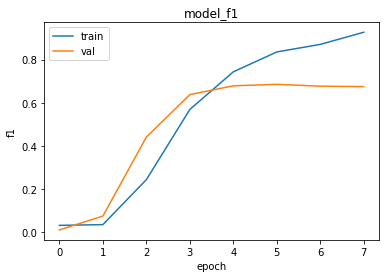

In [179]:
print(model.history.history.keys())
plt.plot(model.history.history['f1'])
plt.plot(model.history.history['val_f1'])
plt.title('model_f1')
plt.ylabel('f1')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [185]:
inputs = tf.keras.layers.Input(shape=(int(MAX_LEN),))
embeddings = tf.keras.layers.Embedding(input_dim=len(token2id), output_dim=100)(inputs)
convs = []

drop1 = tf.keras.layers.Dropout(0.2)(embeddings)
conv1 = tf.keras.layers.Conv1D(kernel_size=3, filters=32, padding='same', strides=1)(drop1)
conv2 = tf.keras.layers.Conv1D(kernel_size=2, filters=10, padding='same', strides=1)(conv1)
conv3 = tf.keras.layers.Conv1D(kernel_size=2, filters=5, padding='same', strides=1)(conv2)
conv4 = tf.keras.layers.Conv1D(kernel_size=2, filters=5, padding='same', strides=1)(conv3)
pool1 = tf.compat.v1.keras.layers.MaxPool1D()(conv4)
convs.append(pool1)

drop2 = tf.keras.layers.Dropout(0.1)(embeddings)
conv5 =  tf.keras.layers.Conv1D(kernel_size=10, filters=5, padding='same', strides=1)(drop2)
pool2 = tf.compat.v1.keras.layers.MaxPool1D()(conv5)
convs.append(pool2)

drop3 = tf.keras.layers.Dropout(0.1)(embeddings)
conv6 = tf.keras.layers.Conv1D(kernel_size=2, filters=10, padding='same', strides=1)(drop3)
conv7 = tf.keras.layers.Conv1D(kernel_size=4, filters=5, padding='same', strides=1)(conv6)
pool3 = tf.compat.v1.keras.layers.MaxPool1D()(conv7)
convs.append(pool3)

drop4 = tf.keras.layers.Dropout(0.2)(embeddings)
conv8 = tf.keras.layers.Conv1D(kernel_size=2, filters=5, padding='same', strides=1)(drop4)
pool4 = tf.compat.v1.keras.layers.MaxPool1D()(conv8)
convs.append(pool4)

concat = tf.keras.layers.concatenate(convs, axis=1)
conv_global = tf.keras.layers.Conv1D(kernel_size=5, filters=32, strides=1)(concat)
flatten = tf.keras.layers.Flatten()(conv_global)
dense = tf.keras.layers.Dense(50, activation='relu')(flatten)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(dense)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=[f1, roc_ouc])

In [186]:
model.fit(X_train, y_train, 
         validation_data=(X_valid, y_valid),
         epochs=50,
         batch_size=2000,
         callbacks=[checkpoint, early_stop])

Train on 48164 samples, validate on 2535 samples
Epoch 1/50
48000/48164 [============================>.] - ETA: 0s - loss: 0.3626 - f1: 0.0110 - auc_1: 0.5750
Epoch 00001: val_f1 did not improve from 0.64969
48164/48164 [==============================] - 42s 873us/sample - loss: 0.3625 - f1: 0.0106 - auc_1: 0.5756 - val_loss: 0.2871 - val_f1: 0.0000e+00 - val_auc_1: 0.7795
Epoch 2/50
48000/48164 [============================>.] - ETA: 0s - loss: 0.2392 - f1: 0.0587 - auc_1: 0.8653
Epoch 00002: val_f1 did not improve from 0.64969
48164/48164 [==============================] - 41s 850us/sample - loss: 0.2390 - f1: 0.0678 - auc_1: 0.8657 - val_loss: 0.2011 - val_f1: 0.3287 - val_auc_1: 0.9056
Epoch 3/50
48000/48164 [============================>.] - ETA: 0s - loss: 0.1549 - f1: 0.6068 - auc_1: 0.9485
Epoch 00003: val_f1 improved from 0.64969 to 0.67918, saving model to model.weights
48164/48164 [==============================] - 42s 866us/sample - loss: 0.1549 - f1: 0.6082 - auc_1: 0.9484

dict_keys(['loss', 'f1', 'auc_1', 'val_loss', 'val_f1', 'val_auc_1'])


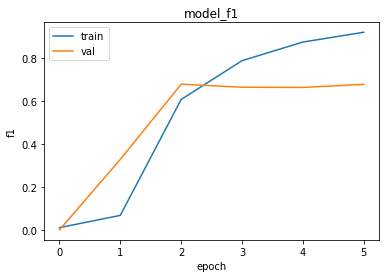

In [187]:
print(model.history.history.keys())
plt.plot(model.history.history['f1'])
plt.plot(model.history.history['val_f1'])
plt.title('model_f1')
plt.ylabel('f1')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Строка 5

Использование токенизации на символьные нграммы (не параметром analyzer=’char’, а вручную или готовым энструментов вроде youtokentome - 2 балла

In [109]:
import youtokentome as yttm

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [111]:
X_train_yttm = '\n'.join(X_train.tolist())

In [112]:
train_data = 'yttm_train_data.txt'

In [113]:
with open(train_data, 'w') as f:
  f.write(X_train_yttm)

In [114]:
yttm_model = 'yttm.model'

In [115]:
yttm.BPE.train(data=train_data, vocab_size=100000, model=yttm_model)

In [119]:
bpe_model = yttm.BPE(model=yttm_model)

In [124]:
encoded_comments = bpe_model.encode(train.comment_text.tolist(), output_type=yttm.OutputType.ID)

In [125]:
train['encoded_comments'] = encoded_comments

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [129]:
[bpe_model.id_to_subword(num) for num in encoded_comments[0]][:10]

['▁"',
 '▁Oppose',
 ',',
 '▁slightly.',
 '▁While',
 '▁I',
 '▁agree',
 '▁that',
 '▁the',
 '▁current']